# Multiple Regression
Vamos pegar um pequeno conjunto de dados de valores de carros do Blue Book:

In [192]:
import pandas as pd

# URL do arquivo Excel
url = 'http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls'

# Lê o arquivo Excel em um DataFrame do Pandas
df = pd.read_excel(url)

# Exibe as primeiras linhas do DataFrame para verificar se os dados foram carregados corretamente
print(df.head())


          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1  


                         Mileage         Price
Mileage                                       
(-0.001, 10000.0]    5588.629630  24096.714451
(10000.0, 20000.0]  15898.496183  21955.979607
(20000.0, 30000.0]  24114.407104  20278.606252
(30000.0, 40000.0]  33610.338710  19463.670267


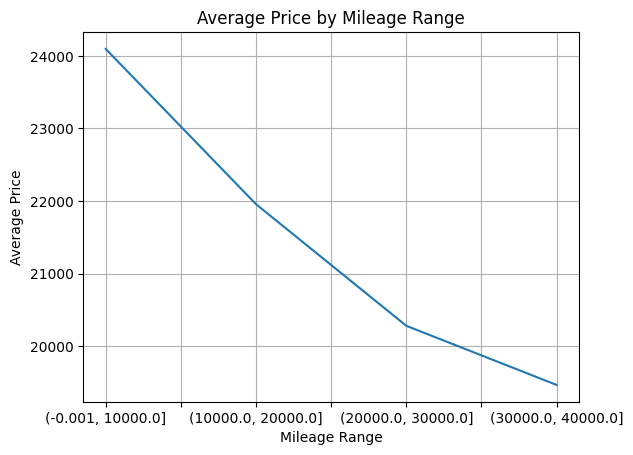

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importa o matplotlib para gráficos

# Se estiver usando Jupyter Notebook, descomente a linha abaixo
# %matplotlib inline

# Carrega o DataFrame a partir da URL do arquivo Excel
url = 'http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls'
df = pd.read_excel(url)

# Seleciona apenas as colunas 'Mileage' e 'Price'
df1 = df[['Mileage', 'Price']]

# Define os intervalos de bins para agrupamento por Mileage
bins = np.arange(0, 50000, 10000)  # Ajustado para incluir o último valor 50000

# Agrupa os dados por intervalos de Mileage e calcula a média dos preços para cada grupo
groups = df1.groupby(pd.cut(df1['Mileage'], bins, include_lowest=True), observed=False).mean()

# Exibe as primeiras linhas do DataFrame agrupado
print(groups.head())

# Plota a média dos preços por intervalo de Mileage
plt.figure()  # Cria uma nova figura
groups['Price'].plot.line()

# Exibe o gráfico
plt.title('Average Price by Mileage Range')
plt.xlabel('Mileage Range')
plt.ylabel('Average Price')
plt.grid(True)  # Adiciona uma grade para facilitar a leitura
plt.show()  # Exibe o gráfico


Podemos usar pandas para dividir essa matriz nos vetores de características nos quais estamos interessados ​​e no valor que estamos tentando prever. Observe como estamos evitando a marca e o modelo; regressões não funcionam bem com valores ordinais, a menos que você possa convertê-los em alguma ordem numérica que faça sentido de alguma forma. Vamos dimensionar nossos dados de recursos no mesmo intervalo para que possamos comparar facilmente os coeficientes obtidos.

In [194]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Carrega o DataFrame a partir da URL do arquivo Excel
url = 'http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls'
df = pd.read_excel(url)

# Inicializa o StandardScaler
scale = StandardScaler()

# Seleciona as colunas de características (features) e a variável dependente (target)
X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

# Certifique-se de que as colunas sejam do tipo float
X[['Mileage', 'Cylinder', 'Doors']] = X[['Mileage', 'Cylinder', 'Doors']].astype(float)

# Padroniza (escala) as colunas de características usando .loc para evitar SettingWithCopyWarning
X.loc[:, ['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']])

# Adiciona uma coluna constante para termo de interceptação
X = sm.add_constant(X)

# Ajusta o modelo de regressão linear usando Ordinary Least Squares (OLS)
est = sm.OLS(y, X).fit()

# Imprime o resumo estatístico do modelo
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           3.95e-77
Time:                        18:17:44   Log-Likelihood:                -8356.7
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     800   BIC:                         1.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.134e+04    279.405     76.388      0.0

C:\Users\jonin\AppData\Local\Temp\ipykernel_30240\1374642968.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = X[['Mileage', 'Cylinder', 'Doors']].astype(float)


A tabela de coeficientes acima nos dá os valores para inserir em uma equação da forma: B0 + B1 * Quilometragem + B2 * cilindros + B3 * portas 
Neste exemplo, fica bem claro que o número de cilindros é mais importante do que qualquer coisa baseada nos coeficientes.

Poderíamos ter descoberto isso antes?

In [195]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surpreendentemente, mais portas não significam um preço mais elevado! (Talvez isso implique um carro esporte em alguns casos?) Portanto, não é surpreendente que seja inútil como preditor aqui. No entanto, este é um conjunto de dados muito pequeno, por isso não podemos realmente ler muito significado nele.

Como você usaria isso para fazer uma previsão real? Comece dimensionando suas múltiplas variáveis ​​de recursos na mesma escala usada para treinar o modelo e, em seguida, basta chamar est.predict() nos recursos dimensionados:

In [196]:
# Dados de entrada para previsão (não escalonados) em um DataFrame
new_data = pd.DataFrame([[45000, 8, 4]], columns=['Mileage', 'Cylinder', 'Doors'])

# Escala os dados de entrada
scaled = scale.transform(new_data)

# Adiciona a coluna constante para o termo de interceptação
scaled = np.insert(scaled, 0, 1)  # Coloca o 1 na posição 0


In [197]:
# Testando com dados típicos
test_data = pd.DataFrame([[25000, 6, 4]], columns=['Mileage', 'Cylinder', 'Doors'])
scaled_test = scale.transform(test_data)
scaled_test = np.insert(scaled_test, 0, 1)

# Realiza a previsão
predicted_test = est.predict(scaled_test)
print(predicted_test)


[22705.94464339]


In [198]:
import numpy as np
import pandas as pd

# Dados de entrada para previsão (não escalonados) em um DataFrame
new_data = pd.DataFrame([[45000, 8, 4]], columns=['Mileage', 'Cylinder', 'Doors'])

# Escala os dados de entrada
scaled = scale.transform(new_data)

# Adiciona a coluna constante para o termo de interceptação
scaled = np.insert(scaled, 0, 1)  # Coloca o 1 na posição 0

# Exibe os dados escalonados
print(scaled)

# Realiza a previsão usando o modelo
predicted = est.predict(scaled)

# Exibe a previsão
print(predicted)


[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]


## Activity
Mexa com os dados de entrada falsos e veja se você consegue criar uma influência mensurável do número de portas no preço. Divirta-se com isso - por que parar nas 4 portas?

In [199]:
print(df.columns)


Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')


In [200]:
print(df.head())


          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1  


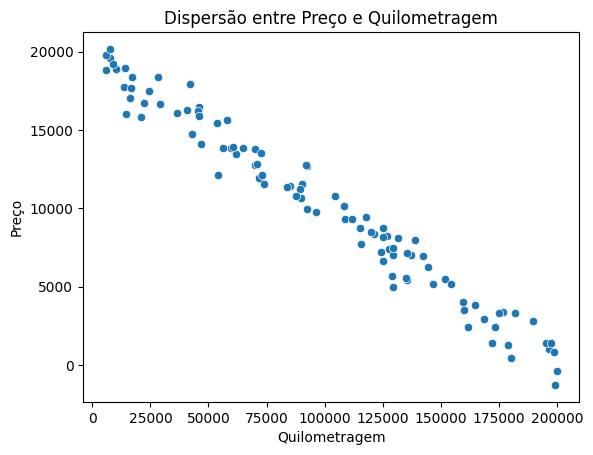

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando um DataFrame simulado
np.random.seed(42)
num_samples = 100
quilometragem = np.random.randint(5000, 200000, size=num_samples)
preco = 20000 - (quilometragem / 10) + np.random.normal(0, 1000, size=num_samples)
df_simulado = pd.DataFrame({'quilometragem': quilometragem, 'preco': preco})

# Gráfico de dispersão
sns.scatterplot(x='quilometragem', y='preco', data=df_simulado)
plt.title('Dispersão entre Preço e Quilometragem')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.show()


In [202]:

# Usando o mesmo DataFrame df
# Incluindo mais variáveis no modelo
X = df[['Mileage', 'Doors', 'Cylinder', 'Liter']]  # Variáveis independentes
y = df['Price']  # Variável dependente

# Adicionando uma constante para o modelo
X = sm.add_constant(X)

# Ajustando o modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           4.97e-76
Time:                        18:17:44   Log-Likelihood:                -8356.6
No. Observations:                 804   AIC:                         1.672e+04
Df Residuals:                     799   BIC:                         1.675e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9226.4515   1849.056      4.990      0.0

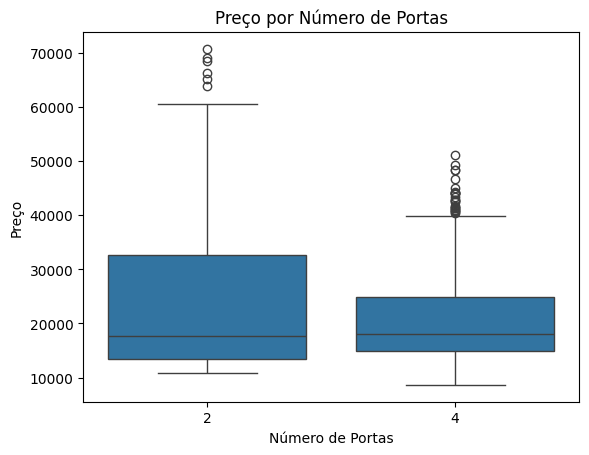

In [203]:
# Gráfico de dispersão entre preço e número de portas
sns.boxplot(x='Doors', y='Price', data=df)
plt.title('Preço por Número de Portas')
plt.xlabel('Número de Portas')
plt.ylabel('Preço')
plt.show()

In [204]:
# Identificando outliers com IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Filtrando outliers
df_no_outliers = df[(df['Price'] >= (Q1 - 1.5 * IQR)) & (df['Price'] <= (Q3 + 1.5 * IQR))]

# Comparando modelos
X_no_outliers = df_no_outliers[['Mileage', 'Doors', 'Cylinder', 'Liter']]
y_no_outliers = df_no_outliers['Price']

# Ajustando o modelo sem outliers
X_no_outliers = sm.add_constant(X_no_outliers)
model_no_outliers = sm.OLS(y_no_outliers, X_no_outliers).fit()
print(model_no_outliers.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     82.16
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           3.11e-58
Time:                        18:17:44   Log-Likelihood:                -8088.0
No. Observations:                 787   AIC:                         1.619e+04
Df Residuals:                     782   BIC:                         1.621e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.046e+04   1660.478      6.298      0.0

In [205]:
# Simulação de dados
np.random.seed(42)
simulated_data = {
    'Mileage': np.random.randint(5000, 200000, size=100),
    'Doors': np.random.choice([2, 4], size=100),
    'Cylinder': np.random.choice([4, 6, 8], size=100),
    'Liter': np.random.uniform(1.5, 5.0, size=100)
}

# Preço simulado com base em algumas relações
simulated_data['Price'] = (simulated_data['Mileage'] * -0.05 + 
                            simulated_data['Doors'] * 1000 + 
                            simulated_data['Cylinder'] * 3000 + 
                            simulated_data['Liter'] * 2000 + 
                            np.random.normal(0, 5000, 100))

simulated_df = pd.DataFrame(simulated_data)

# Ajustando um modelo no conjunto de dados simulado
X_sim = simulated_df[['Mileage', 'Doors', 'Cylinder', 'Liter']]
y_sim = simulated_df['Price']
X_sim = sm.add_constant(X_sim)
model_sim = sm.OLS(y_sim, X_sim).fit()
print(model_sim.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     42.43
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           2.27e-20
Time:                        18:17:44   Log-Likelihood:                -991.71
No. Observations:                 100   AIC:                             1993.
Df Residuals:                      95   BIC:                             2006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2281.4119   2823.133      0.808      0.4